In [64]:
#Libraries import
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_log_error,r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

import seaborn as sns

# Data preprocessing

In [114]:
#Load data
data = pd.read_csv('FinalData.csv')
data

,City,Year,Shell,Volume,Mileage,Transmission,Rudder,Gear,CustomsCleared,Type Engine,Company,Model,Price
0,Уральск,2014,внедорожник,1.7,31000,механика,слева,полный привод,Да,бензин,Chevrolet,Niva,2900000
1,Нур-Султан (Астана),2014,седан,3.5,59800,автомат,слева,передний привод,Да,бензин,Kia,Cadenza,8600000
2,Тараз,1995,фургон,2.3,450650,механика,слева,задний привод,Да,дизель,Volkswagen,LT,1100000
3,Алматы,2018,седан,2.5,48000,типтроник,слева,передний привод,Да,бензин,Toyota,Camry,11300000
4,Караганда,1997,внедорожник,3.5,153000,автомат,справа,полный привод,Нет,бензин,Mitsubishi,Pajero,3350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16030,Костанай,2014,седан,1.6,160000,механика,слева,передний привод,Нет,бензин,Datsun,on-DO,1550000
16031,Сайхин,2008,внедорожник,1.8,175000,механика,слева,полный привод,Да,бензин,Chevrolet,Niva,1500000
16032,Нур-Султан (Астана),2014,седан,1.5,103000,механика,слева,передний привод,Да,бензин,Daewoo,Gentra,3300000
16033,Алматы,2014,внедорожник,4.0,87000,автомат,слева,полный привод,Да,бензин,Toyota,Land Cruiser Prado,18500000


In [66]:
# Checking for the nulls in columns
data.isnull().sum()

City              0
Year              0
Shell             0
Volume            0
Mileage           0
Transmission      0
Rudder            0
Gear              0
CustomsCleared    0
Type Engine       0
Company           0
Model             0
Price             0
dtype: int64

In [115]:
print(data.isnull().values.any())

False


## Checking and dropping outliers

So we see,that we have 4 numerical and 9 categorical columns. And there's no any null values in each column

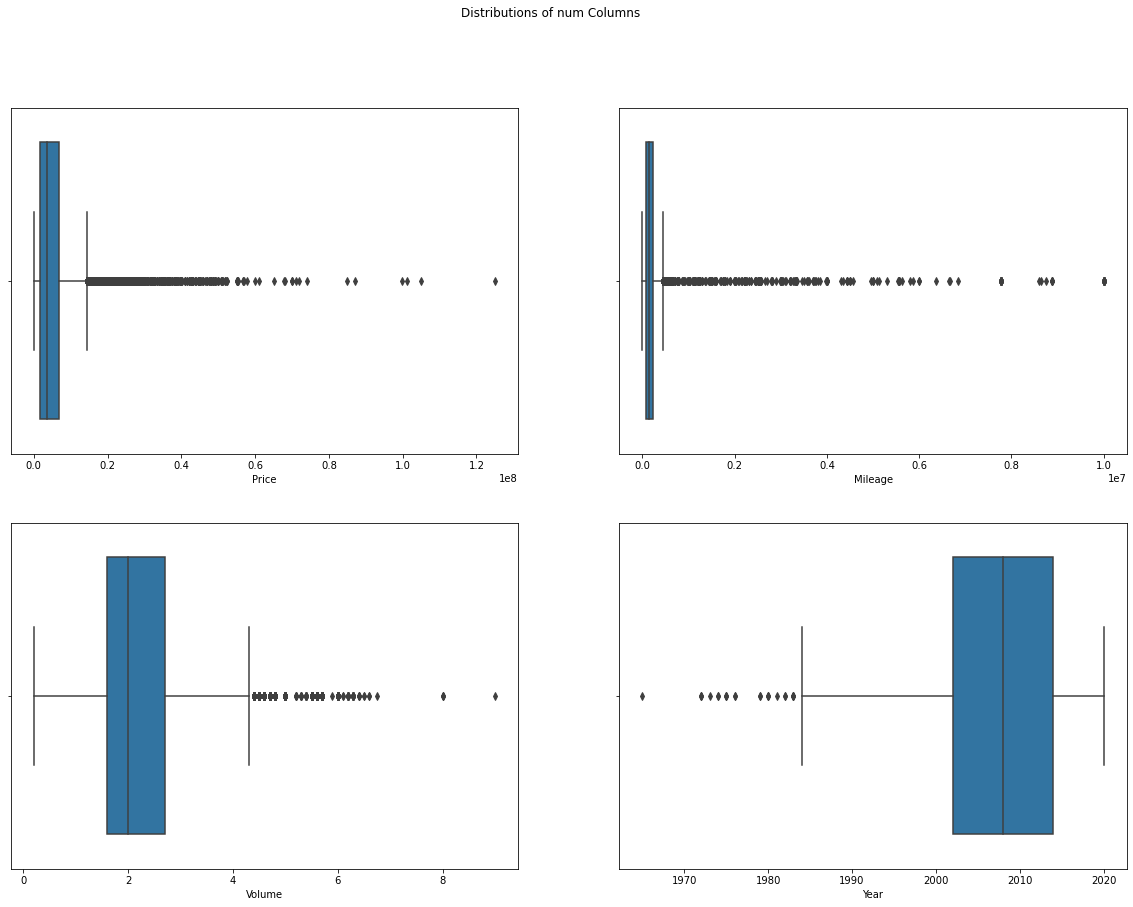

In [68]:
# Visualizing outliers using boxplots
fig, axes = plt.subplots(2, 2, figsize=(20, 14))
fig.suptitle('Distributions of num Columns')
sns.boxplot(ax=axes[0, 0], data=data, x='Price')
sns.boxplot(ax=axes[0, 1], data=data, x='Mileage')
sns.boxplot(ax=axes[1, 0], data=data, x='Volume')
sns.boxplot(ax=axes[1, 1], data=data, x='Year')

In [69]:
#Print an information about outliers
#For specific column
print('Price outliers: ',len(data[data['Price'] >= 0.2 * 10**8]))
print('Mileage outliers: ',len(data[data['Mileage'] >= 0.1 * 10**7]))
print('Volume outliers: ',len(data[data['Volume'] >= 4.7]))
print('Year outliers: ',len(data[data['Year'] <= 1985]))

#Total count of outliers
count_outliers = len(data[(data['Year'] <= 1985) | (data['Volume'] >= 4.7) | (data['Mileage'] >= 1000000) | (data['Price'] >= 20000000)])

#Total count of all outliers and count of rows with and without its
print('Amount of outliers: ', count_outliers)
print('Count of rows with outliers', len(data))
print('Count of rows without of outliers: ', len(data) - count_outliers)

Price outliers:  742
Mileage outliers:  340
Volume outliers:  880
Year outliers:  43
Amount of outliers:  1733
Count of rows with outliers 16035
Count of rows without of outliers:  14302


In [116]:
# Dropping all outliers
data.drop(data[data['Mileage'] >= 0.1 * 10**7].index, inplace=True)
data.drop(data[data['Price'] >= 0.2 * 10**8].index, inplace=True)
data.drop(data[data['Volume'] >= 4.7].index,inplace=True)
data.drop(data[data['Year'] <= 1985].index, inplace=True)

In [117]:
# Looking at the result
data

,City,Year,Shell,Volume,Mileage,Transmission,Rudder,Gear,CustomsCleared,Type Engine,Company,Model,Price
0,Уральск,2014,внедорожник,1.7,31000,механика,слева,полный привод,Да,бензин,Chevrolet,Niva,2900000
1,Нур-Султан (Астана),2014,седан,3.5,59800,автомат,слева,передний привод,Да,бензин,Kia,Cadenza,8600000
2,Тараз,1995,фургон,2.3,450650,механика,слева,задний привод,Да,дизель,Volkswagen,LT,1100000
3,Алматы,2018,седан,2.5,48000,типтроник,слева,передний привод,Да,бензин,Toyota,Camry,11300000
4,Караганда,1997,внедорожник,3.5,153000,автомат,справа,полный привод,Нет,бензин,Mitsubishi,Pajero,3350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16030,Костанай,2014,седан,1.6,160000,механика,слева,передний привод,Нет,бензин,Datsun,on-DO,1550000
16031,Сайхин,2008,внедорожник,1.8,175000,механика,слева,полный привод,Да,бензин,Chevrolet,Niva,1500000
16032,Нур-Султан (Астана),2014,седан,1.5,103000,механика,слева,передний привод,Да,бензин,Daewoo,Gentra,3300000
16033,Алматы,2014,внедорожник,4.0,87000,автомат,слева,полный привод,Да,бензин,Toyota,Land Cruiser Prado,18500000


## Checking on outliers again

Well, we didn't drop all the outliers ,only most of them,now we can take a detail look and check our dataset for outliers again

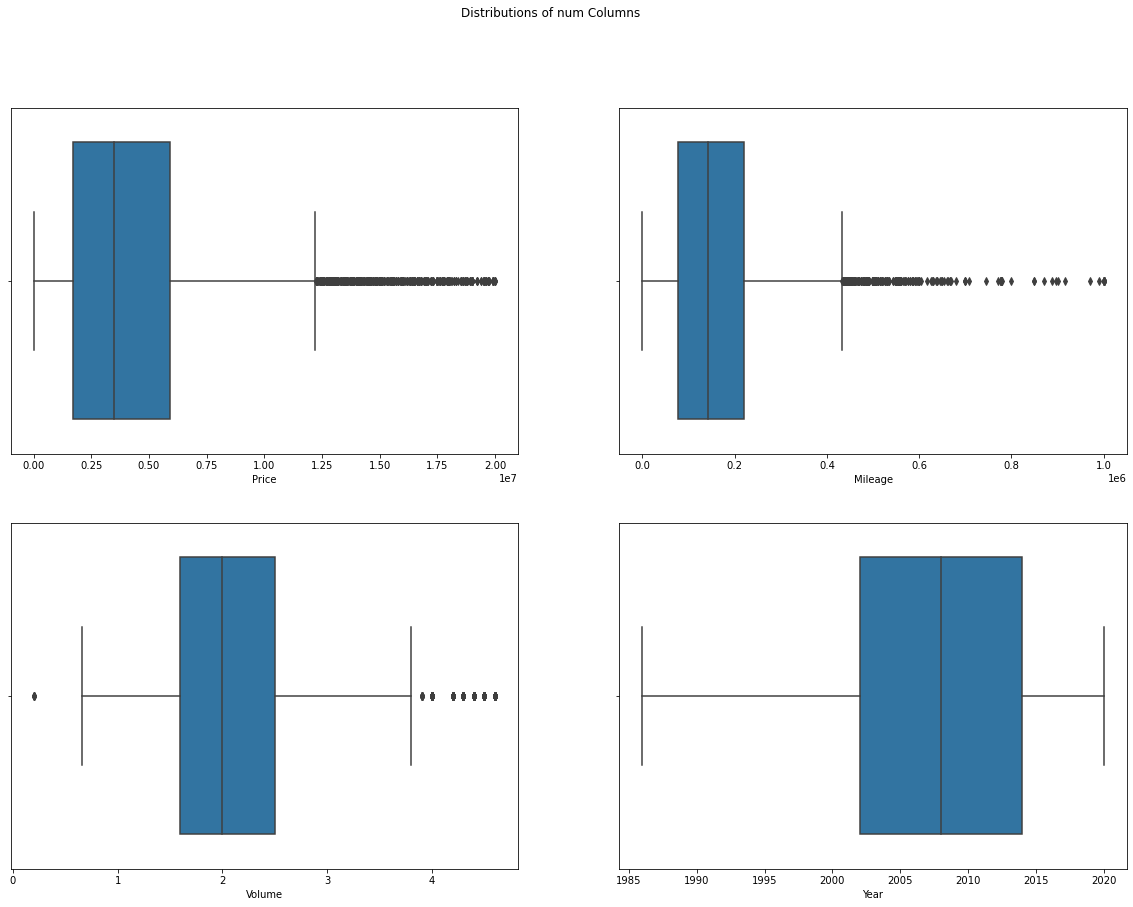

In [72]:
fig, axes = plt.subplots(2, 2, figsize=(20, 14))
fig.suptitle('Distributions of num Columns')
sns.boxplot(ax=axes[0, 0], data=data, x='Price')
sns.boxplot(ax=axes[0, 1], data=data, x='Mileage')
sns.boxplot(ax=axes[1, 0], data=data, x='Volume')
sns.boxplot(ax=axes[1, 1], data=data, x='Year')

In [118]:
# Recording the count of outliers for each column
price_outliers = len(data[data['Price'] >= 1.22 * 10**7])
mileage_outliers = len(data[data['Mileage'] >= 0.48 * 10**6])
volume_outliers = len(data[(data['Volume'] >= 3.7) | (data['Volume'] < 0.3)])

# Print amount of outliers for each column
print('Price outliers: ',len(data[data['Price'] >= 1.22 * 10**7]))
print('Mileage outliers: ',len(data[data['Mileage'] >= 0.48 * 10**6]))
print('Volume outliers: ',len(data[(data['Volume'] >= 3.7) | (data['Volume'] < 0.3)]))

count_outliers = price_outliers + mileage_outliers + volume_outliers

# Print total count of outliers and count of rows with and without outliers
print('Amount of outliers: ', count_outliers)
print('Count of rows with outliers', len(data))
print('Count of rows without of outliers: ', len(data) - count_outliers)

Price outliers:  879
Mileage outliers:  222
Volume outliers:  503
Amount of outliers:  1604
Count of rows with outliers 14302
Count of rows without of outliers:  12698


In [119]:
# Dropping all outliers
data.drop(data[data['Price'] >= 1.22 * 10**7].index, inplace=True)
data.drop(data[data['Mileage'] >= 0.48 * 10**6].index, inplace=True)
data.drop(data[(data['Volume'] >= 3.7) | (data['Volume'] < 0.3)].index,inplace=True)

In [120]:
data

,City,Year,Shell,Volume,Mileage,Transmission,Rudder,Gear,CustomsCleared,Type Engine,Company,Model,Price
0,Уральск,2014,внедорожник,1.7,31000,механика,слева,полный привод,Да,бензин,Chevrolet,Niva,2900000
1,Нур-Султан (Астана),2014,седан,3.5,59800,автомат,слева,передний привод,Да,бензин,Kia,Cadenza,8600000
2,Тараз,1995,фургон,2.3,450650,механика,слева,задний привод,Да,дизель,Volkswagen,LT,1100000
3,Алматы,2018,седан,2.5,48000,типтроник,слева,передний привод,Да,бензин,Toyota,Camry,11300000
4,Караганда,1997,внедорожник,3.5,153000,автомат,справа,полный привод,Нет,бензин,Mitsubishi,Pajero,3350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16029,Тараз,1989,седан,2.0,338065,механика,слева,передний привод,Да,бензин,Audi,80,570000
16030,Костанай,2014,седан,1.6,160000,механика,слева,передний привод,Нет,бензин,Datsun,on-DO,1550000
16031,Сайхин,2008,внедорожник,1.8,175000,механика,слева,полный привод,Да,бензин,Chevrolet,Niva,1500000
16032,Нур-Султан (Астана),2014,седан,1.5,103000,механика,слева,передний привод,Да,бензин,Daewoo,Gentra,3300000


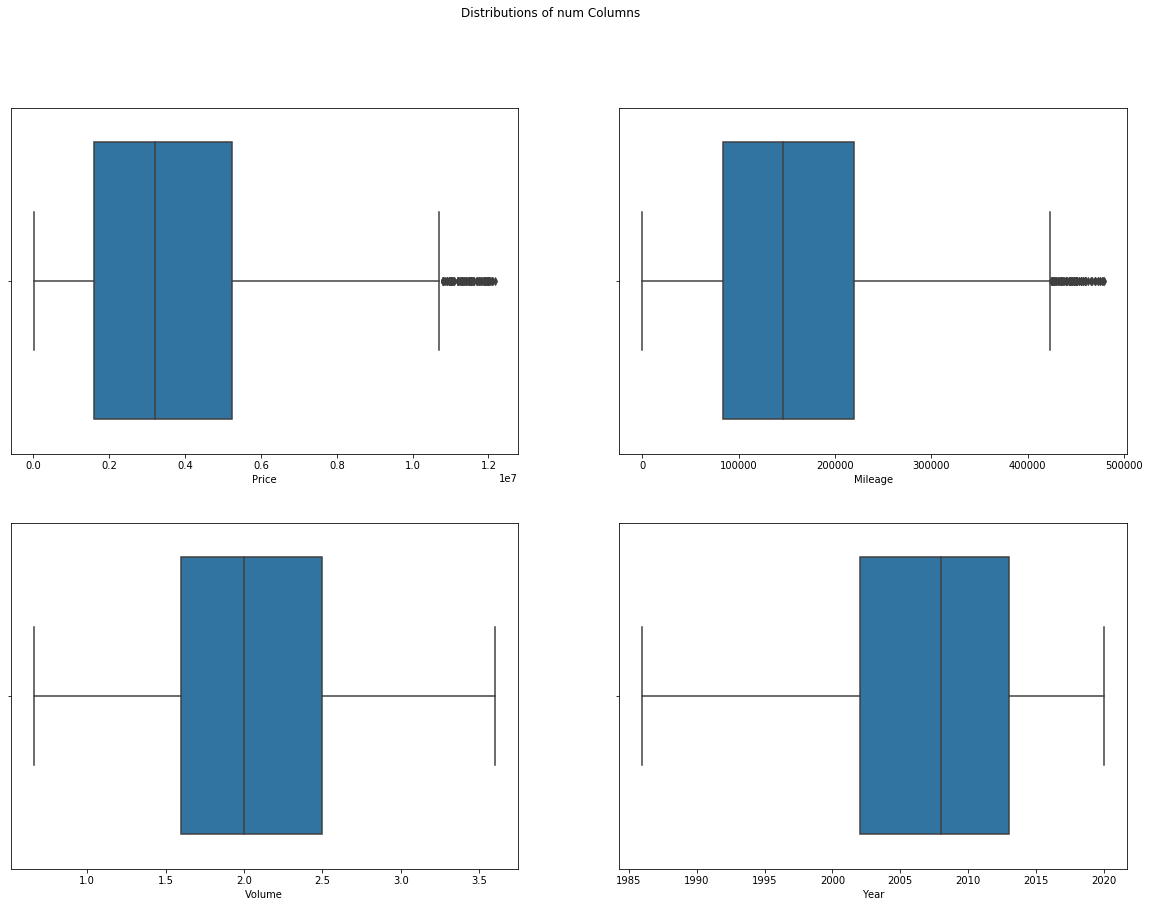

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(20, 14))
fig.suptitle('Distributions of num Columns')
sns.boxplot(ax=axes[0, 0], data=data, x='Price')
sns.boxplot(ax=axes[0, 1], data=data, x='Mileage')
sns.boxplot(ax=axes[1, 0], data=data, x='Volume')
sns.boxplot(ax=axes[1, 1], data=data, x='Year')

We've got rid of the most part of outliers and the rest count of them is not too essential.So then we can go ahead

## Transforming data

In [121]:
# Splitting our columns on categorical and numerical

# Numerical columns names
num_cols = data.select_dtypes(include=np.number).columns

# Categorical columns names
cat_cols = data.select_dtypes(exclude=np.number).columns

In [122]:
print(num_cols)
print(cat_cols)

Index(['Year', 'Volume', 'Mileage', 'Price'], dtype='object')
Index(['City', 'Shell', 'Transmission', 'Rudder', 'Gear', 'CustomsCleared',
       'Type Engine', 'Company', 'Model'],
      dtype='object')


Now we need to transform our categorical data to numerical for the training our model

In [123]:
# Print how much unique values has each categorical column
for col in cat_cols:
    print('%s : %d' % (col,data[col].nunique()))

City : 193
Shell : 17
Transmission : 5
Rudder : 2
Gear : 3
CustomsCleared : 2
Type Engine : 5
Company : 72
Model : 765


In [124]:
# We gonna encode label using LabelEncoder
le = preprocessing.LabelEncoder()
data[cat_cols] = data[cat_cols].apply(le.fit_transform)
data[cat_cols].head()

,City,Shell,Transmission,Rudder,Gear,CustomsCleared,Type Engine,Company,Model
0,161,0,2,0,2,0,0,11,495
1,113,11,0,0,1,0,0,34,197
2,146,14,2,0,0,0,4,60,417
3,15,11,4,0,1,0,0,59,202
4,77,0,0,1,2,1,0,42,513


In [125]:
#scaling numerical data

norm = StandardScaler()
data['Price'] = np.log(data['Price'])
data['Mileage'] = norm.fit_transform(np.array(data['Mileage']).reshape(-1,1))
data['Year'] = norm.fit_transform(np.array(data['Year']).reshape(-1,1))
data['Company'] = norm.fit_transform(np.array(data['Company']).reshape(-1,1))
data['Model'] = norm.fit_transform(np.array(data['Model']).reshape(-1,1))
data['City'] = norm.fit_transform(np.array(data['City']).reshape(-1,1))


#scaling target variable
q1,q3=(data['Price'].quantile([0.25,0.75]))
o1=q1-1.5*(q3-q1)
o2=q3+1.5*(q3-q1)
data=data[(data.Price>=o1) & (data.Price<=o2)]

In [126]:
data.head()

,City,Year,Shell,Volume,Mileage,Transmission,Rudder,Gear,CustomsCleared,Type Engine,Company,Model,Price
0,1.222430,0.887418,0,1.7,-1.222239,2,0,2,0,0,-1.761043,0.771504,14.880221
1,0.458107,0.887418,11,3.5,-0.942271,0,0,1,0,0,-0.549343,-0.571722,15.967273
2,0.983579,-1.515886,14,2.3,2.857233,2,0,0,0,4,0.820405,0.419921,13.910821
3,-1.102385,1.393377,11,2.5,-1.056980,4,0,1,0,0,0.767723,-0.549185,16.240313
4,-0.115135,-1.262907,0,3.5,-0.036261,0,1,2,1,0,-0.127882,0.852638,15.024471


## Data split

In [127]:
X = np.array(data.iloc[:, :-1])
y = np.array(data.iloc[:, -1:])

In [128]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=0)

Perhaps, during predictions our model will get negative values,so to prevent it,we need to create a specific function,that would remove all negative values

In [129]:
# function that removes all negative predictions
def remove_neg(y_test, pred):
    indexes = [index for index in range(len(pred)) if(pred[index] > 0)]
    pred = pred[indexes]
    y_test = y_test[indexes]
    pred[pred < 0]
    return (y_test, pred)

In [130]:
# function for evaluating our models. Returns MSE, Root MSE, R2 score, and R2 score in %
def result(y_test,pred):
    result=[]
    result.append(mean_squared_log_error(y_test, pred))
    result.append(np.sqrt(result[0]))
    result.append(r2_score(y_test,pred))
    result.append(round(r2_score(y_test,pred)*100,4))
    result.append(mean_absolute_error(y_test,pred))
    return (result)

## Model preparing

As we need to predict price we are going to use regression algoritms.We selected the some of the regression models such as:

* Linear Regression
* KNN
* Random Forest Regressor
* Decision Tree Regressor
* Multiple Linear Regression
* Lasso Regression
* Bagging Regression

In [131]:
# Libraries import
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import LassoCV

from sklearn.model_selection import GridSearchCV

### Linear Regression

In [132]:
# Model fitting
linReg = LinearRegression()
linReg.fit(X_train,y_train)
linReg_pred = linReg.predict(X_test)

#### Feature selection

In [133]:
# Feature selection
# Embedded method with LassoCV
lin_lassoCV = LassoCV(cv=10)
lin_lassoCV.fit(X,y)

C:\1\Anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LassoCV(cv=10)

In [134]:
print("Best alpha using sklearn built-in LassoCV method is: %f" % lin_lassoCV.alpha_)
print("Best score using sklearn built-in LassoCV method is : %f" % lin_lassoCV.score(X,y))

coef = pd.Series(lin_lassoCV.coef_, index = data.drop('Price',axis=1).columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Best alpha using sklearn built-in LassoCV method is: 0.001427
Best score using sklearn built-in LassoCV method is : 0.755614
Lasso picked 11 variables and eliminated the other 1 variables


Text(0.5, 1.0, 'Feature importance using LassoCV Model')

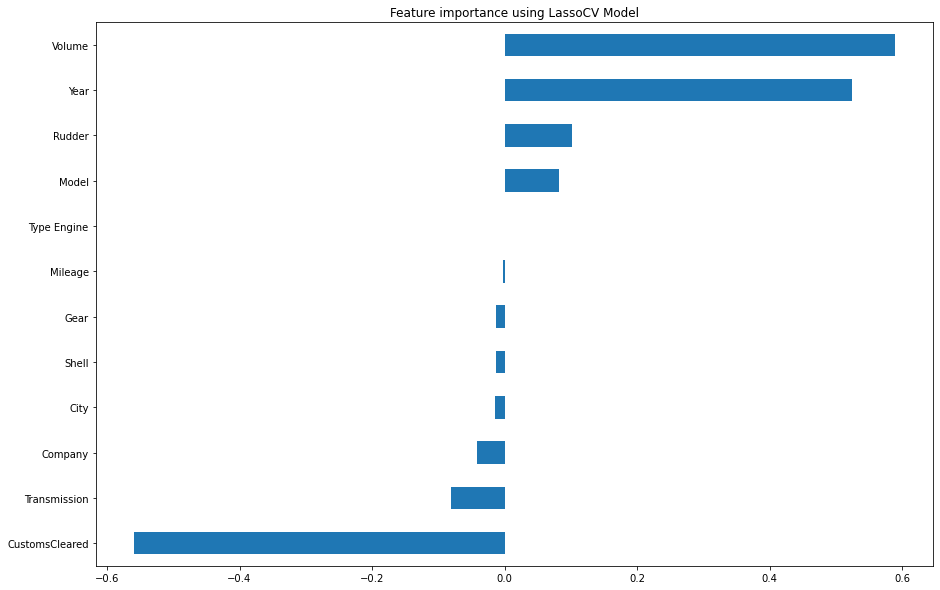

In [135]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using LassoCV Model")

In [136]:
imp_coef

CustomsCleared   -0.559480
Transmission     -0.081195
Company          -0.041944
City             -0.014091
Shell            -0.013723
Gear             -0.012987
Mileage          -0.002299
Type Engine      -0.000000
Model             0.082095
Rudder            0.101535
Year              0.524053
Volume            0.588623
dtype: float64

In [137]:
# Feature selection 
# Recursive Feature Elimination

from sklearn.feature_selection import RFE

rfe = RFE(linReg, 4)
fit = rfe.fit(X, y)

for i in range(len(data.columns.values) - 1):
    if(fit.support_[i] == True):
        print(i, data.columns.values[i],fit.support_[i],fit.ranking_[i])

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

1 Year True 1
3 Volume True 1
6 Rudder True 1
8 CustomsCleared True 1
Num Features: 4
Selected Features: [False  True False  True False False  True False  True False False False]
Feature Ranking: [6 1 7 1 8 3 1 5 1 9 4 2]


C:\1\Anaconda\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=4 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Two different methodics give as slightly different results,but as we can see, in the both of them there're Year,Mileage and Volume as the features with the highest coefficients or importance

In [138]:
lin_X = np.array(data[['Year','Volume','Mileage']])
lin_X_train,lin_X_test,lin_y_train,lin_y_test=train_test_split(lin_X,y,train_size=0.8,test_size=0.2,random_state=0)

#### Cross Validation and Grid Search for hyperparameter tuning

Since we used simple model of Linear Regression we didn't need to perform any hyperparameters tuning

In [139]:
linReg.fit(lin_X_train,lin_y_train)
linReg.predict(lin_X_test)

from sklearn.model_selection import cross_val_score
lin_score = cross_val_score(linReg,lin_X_test,lin_y_test,cv=10,scoring='neg_mean_squared_error')
-lin_score.mean()

0.24612301054658628

### Regularization: Lasso and Ridge Regressions 

**Lasso Regression** (Least Absolute Shrinkage and Selection Operatior) is a modification of linear regression, but in Lasso the lost function is modified to minimize the complexity of the model by limiting the sum of the absolute values of the model coefficients(also called as the l1-norm)

**Ridge Regression** is also an extension of linear ,but within the Ridge loss function is modified to minimize the complexity of the model. This modification is done by adding a penalty parameter that is equivalent to the square of the magnitude of the coefficients.Also known as l2-norm

As the Ridge and Lasso are modifications of Linear so we can use the same feautures for training these models.

Lasso works better when we need have more features and we need to make our model simpler and interpretable,but it's not good decision if our features have high correlation and vice cetera 
Ridge works better when we have less features or when we have features with high correlation ,but otherwise, in most cases, should be avoided due to higher complexity and lower interpretability(which is really important for practical data evaluation).

For our case, most preferably to use Ridge Regression Model,but just for experiment,we explored and Lasso too.

In [140]:
alpha = [np.around(0.1**i,i) for i in range(10)]

In [141]:
alpha_values = alpha + [1,2,3,4,5,10,20,30,40,50]
alpha_values

[1.0,
 0.1,
 0.01,
 0.001,
 0.0001,
 1e-05,
 1e-06,
 1e-07,
 1e-08,
 1e-09,
 1,
 2,
 3,
 4,
 5,
 10,
 20,
 30,
 40,
 50]

In [142]:
from sklearn.linear_model import Ridge, Lasso
grid_lasso = GridSearchCV(estimator = Lasso(), param_grid = {'alpha':alpha_values},cv=10,scoring='neg_mean_squared_error')

In [143]:
grid_lasso.fit(lin_X,y)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1.0, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06,
                                   1e-07, 1e-08, 1e-09, 1, 2, 3, 4, 5, 10, 20,
                                   30, 40, 50]},
             scoring='neg_mean_squared_error')

In [144]:
grid_lasso.best_estimator_

Lasso(alpha=0.001)

In [145]:
lasso_score = -grid_lasso.best_score_

In [146]:
grid_ridge = GridSearchCV(estimator = Ridge(), param_grid = {'alpha':alpha_values},cv=10,scoring='neg_mean_squared_error')

In [147]:
grid_ridge.fit(lin_X,y)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06,
                                   1e-07, 1e-08, 1e-09, 1, 2, 3, 4, 5, 10, 20,
                                   30, 40, 50]},
             scoring='neg_mean_squared_error')

In [148]:
grid_ridge.best_estimator_

Ridge(alpha=1e-09)

In [149]:
ridge_score = -grid_ridge.best_score_

In [150]:
lasso_score > ridge_score

False

Ridge is smaller than lasso,what means,that Ridge has better score

### KNN

In [151]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [152]:
# Feature selection
# Embedded method with LassoCV
knn_lassoCV = LassoCV()
knn_lassoCV.fit(X,y)

C:\1\Anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LassoCV()

In [153]:
print("Best alpha using sklearn built-in LassoCV method is: %f" % knn_lassoCV.alpha_)
print("Best score using sklearn built-in LassoCV method is : %f" % knn_lassoCV.score(X,y))

coef = pd.Series(knn_lassoCV.coef_, index = data.drop('Price',axis=1).columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Best alpha using sklearn built-in LassoCV method is: 0.001427
Best score using sklearn built-in LassoCV method is : 0.755614
Lasso picked 11 variables and eliminated the other 1 variables


Text(0.5, 1.0, 'Feature importance using LassoCV Model')

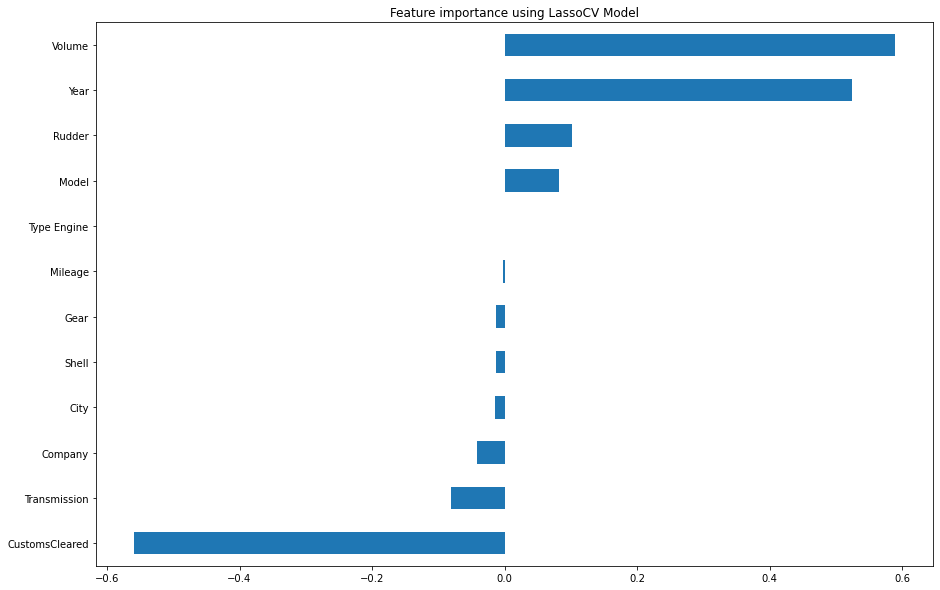

In [154]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using LassoCV Model")

In [155]:
imp_coef

CustomsCleared   -0.559480
Transmission     -0.081195
Company          -0.041944
City             -0.014091
Shell            -0.013723
Gear             -0.012987
Mileage          -0.002299
Type Engine      -0.000000
Model             0.082095
Rudder            0.101535
Year              0.524053
Volume            0.588623
dtype: float64

In [156]:
# Model fitting
cv_n_neighbors = list(range(1,31))
params_knn = {
    'n_neighbors' : cv_n_neighbors
}

grid_knn = GridSearchCV(estimator = KNeighborsRegressor(), param_grid = params_knn,cv=10,scoring='neg_mean_squared_error')

In [157]:
grid_knn.fit(X,y)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='neg_mean_squared_error')

In [158]:
grid_knn.best_estimator_

KNeighborsRegressor()

In [159]:
knn_score = -grid_knn.best_score_
knn_score

0.10388728597845535

### Random Forest Tree

In [160]:
rft = RandomForestRegressor()
rft.fit(X_train,y_train)
rft.predict(X_test)

<ipython-input-160-deb4ff6b2828>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rft.fit(X_train,y_train)


array([15.62343745, 15.41334188, 14.74897285, ..., 15.42740198,
       15.52269902, 14.80339273])

In [161]:
# Creating a DataFrame of feature importance for each feature
rft_feature_importance = pd.DataFrame(rft.feature_importances_, index=data.drop('Price',axis=1).columns.values,columns=['feature importance']).sort_values('feature importance', ascending=True)

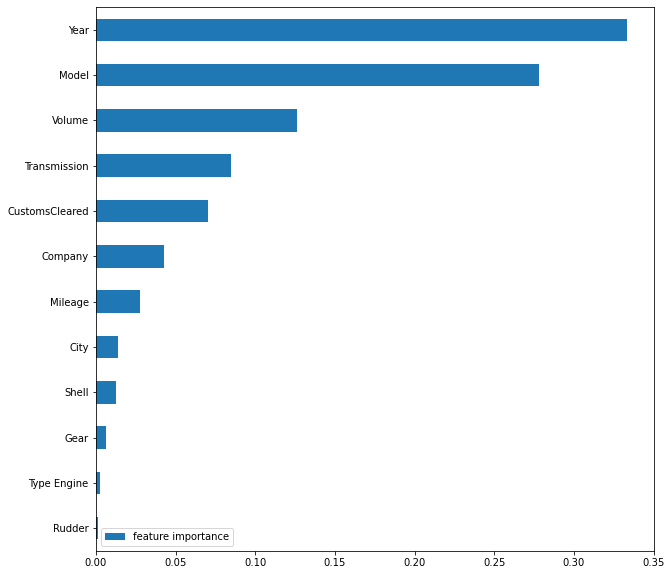

In [162]:
rft_feature_importance.plot(kind='barh',figsize=(10,10))

In [163]:
# The lower importance the better it is
rft_feature_importance

,feature importance
Rudder,0.001217
Type Engine,0.002807
Gear,0.006288
Shell,0.012741
City,0.013637
Mileage,0.027478
Company,0.042897
CustomsCleared,0.070128
Transmission,0.085066
Volume,0.126336


In [164]:
rft_X = np.array(data[['Year','Volume','Mileage','Model','CustomsCleared','Transmission','Company']])
rft_X_train,rft_X_test,rft_y_train,rft_y_test=train_test_split(rft_X,y,train_size=0.8,test_size=0.2,random_state=0)

In [165]:
# Model fitting
cv_n_estimators = list(range(100,500,100))
cv_random_state = list(range(1,5))
cv_min_samples_leaf = list(range(1,10))
cv_oob_score = [True, False]
max_depth=list(range(1,9))
params_rfr = {
    'n_estimators' : cv_n_estimators,
    'random_state': cv_random_state,
    'min_samples_leaf': cv_min_samples_leaf,
    'oob_score': cv_oob_score,
    'max_depth':max_depth
}

grid_rft = GridSearchCV(estimator = RandomForestRegressor(), param_grid = params_rfr,cv=10,n_jobs=-1)

In [166]:
grid_rft.fit(rft_X,y)

C:\1\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [100, 200, 300, 400],
                         'oob_score': [True, False],
                         'random_state': [1, 2, 3, 4]})

In [25]:
grid_rft.best_estimator_

RandomForestRegressor(max_depth=8, min_samples_leaf=2, n_estimators=200,
                      oob_score=True, random_state=2)

In [167]:
rft_score = -grid_rft.score(rft_X_test,y_test)

In [168]:
rft_score

-0.8852404479716109

In [169]:
rft = RandomForestRegressor(max_depth=8, min_samples_leaf=2, n_estimators=200,
                      oob_score=True, random_state=2)
rft.fit(rft_X_train,rft_y_train)

<ipython-input-169-d866796417d5>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rft.fit(rft_X_train,rft_y_train)


RandomForestRegressor(max_depth=8, min_samples_leaf=2, n_estimators=200,
                      oob_score=True, random_state=2)

In [170]:
import pickle
file = open('betaV1.pkl','wb')
pickle.dump(rft,file)
file.close()

In [171]:
data.head()

,City,Year,Shell,Volume,Mileage,Transmission,Rudder,Gear,CustomsCleared,Type Engine,Company,Model,Price
0,1.222430,0.887418,0,1.7,-1.222239,2,0,2,0,0,-1.761043,0.771504,14.880221
1,0.458107,0.887418,11,3.5,-0.942271,0,0,1,0,0,-0.549343,-0.571722,15.967273
2,0.983579,-1.515886,14,2.3,2.857233,2,0,0,0,4,0.820405,0.419921,13.910821
3,-1.102385,1.393377,11,2.5,-1.056980,4,0,1,0,0,0.767723,-0.549185,16.240313
4,-0.115135,-1.262907,0,3.5,-0.036261,0,1,2,1,0,-0.127882,0.852638,15.024471


In [177]:
model = pickle.load(open('betaV1.pkl','rb'))
#'Year','Volume','Mileage','Model','CustomsCleared','Transmission','Company'
# p = model.predict([[0.887418,1.7,-1.222239,0.771504,0,2,-1.761043]])
p = model.predict([[0.887418,3.5,-0.942271,-0.571722,0,0,-0.549343]])
print(round(np.e**p[0]))

8748386.0


### Decision Tree

#### Feature selection

Before training our model. We need to select hyperparameters,what means that we need to choose only those features,with biggest weights or importance in predicting. So that will help up avoid such problems as overfitting

**Forward/Backward methods.** As the name suggest, we feed all the possible features to the model at first. We check the performance of the model and then iteratively remove the worst performing features one by one till the overall performance of the model comes in acceptable range.

In [178]:
# Feature selection
# Forward/Backward Selection
dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(X_train,y_train)
dtr_pred = dtr.predict(X_test)

In [179]:
# Creating a DataFrame of feature importance for each feature
dtr_feature_importance = pd.DataFrame(dtr.feature_importances_, index=data.drop('Price',axis=1).columns.values,columns=['feature importance']).sort_values('feature importance', ascending=True)

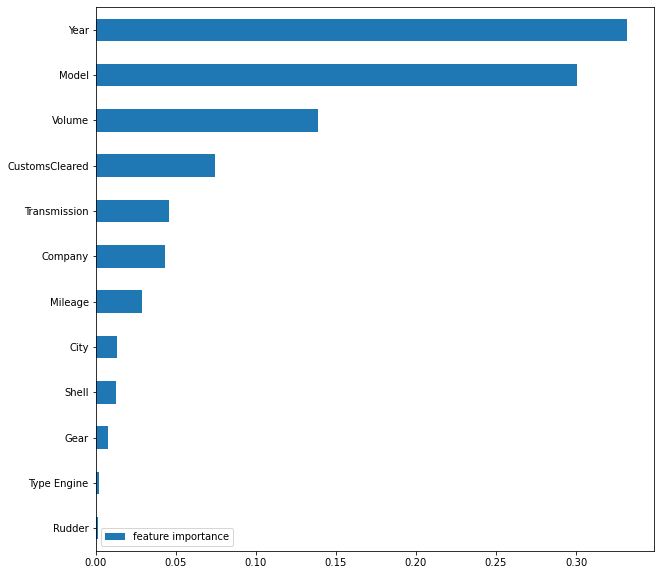

In [180]:
dtr_feature_importance.plot(kind='barh',figsize=(10,10))


**Embedded methods** are iterative in a sense that takes care of each iteration of the model training process and carefully extract those features which contribute the most to the training for a particular iteration. Regularization methods are the most commonly used embedded methods which penalize a feature given a coefficient threshold.

In [181]:
# Feature selection
# Embedded method with LassoCV
dtr_lassoCV = LassoCV()
dtr_lassoCV.fit(X,y)

C:\1\Anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LassoCV()

In [182]:
print("Best alpha using sklearn built-in LassoCV method is: %f" % dtr_lassoCV.alpha_)
print("Best score using sklearn built-in LassoCV method is : %f" %dtr_lassoCV.score(X,y))

coef = pd.Series(dtr_lassoCV.coef_, index = data.drop('Price',axis=1).columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Best alpha using sklearn built-in LassoCV method is: 0.001427
Best score using sklearn built-in LassoCV method is : 0.755614
Lasso picked 11 variables and eliminated the other 1 variables


Text(0.5, 1.0, 'Feature importance using LassoCV Model')

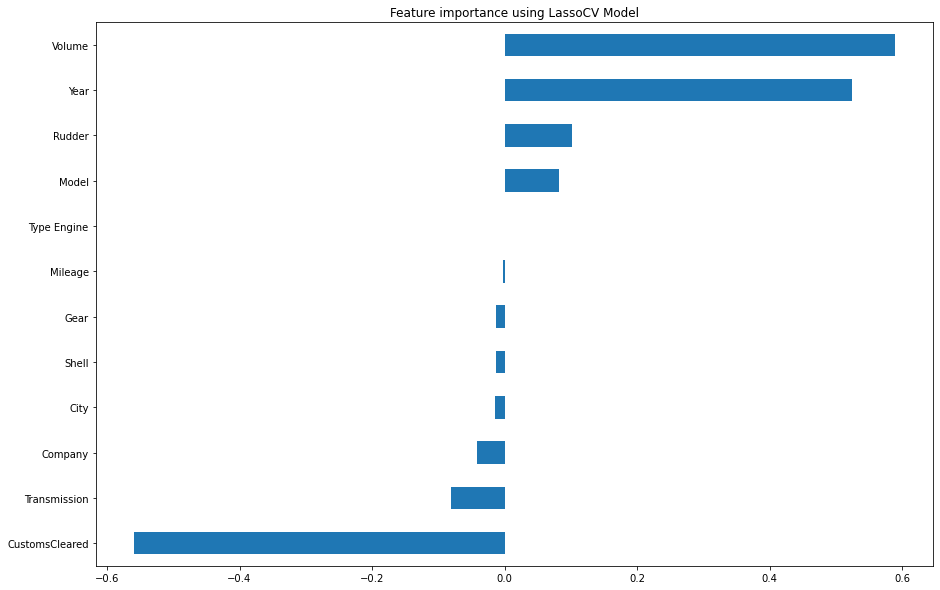

In [183]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using LassoCV Model")

In [184]:
dtr_X = np.array(data[['Year','Volume','Mileage','Model','CustomsCleared','Transmission','Company']])
dtr_X_train,dtr_X_test,dtr_y_train,dtr_y_test=train_test_split(dtr_X,y,train_size=0.8,test_size=0.2,random_state=0)

In [185]:
# Model fitting
cv_random_state = list(range(1,50))
cv_max_depth = list(range(1,6))
cv_criterion = ['mse','mae','friedman_mse']

params_dtr = {
    "criterion":cv_criterion,
    "max_depth":cv_max_depth,
    "random_state":cv_random_state
}

grid_dtr = GridSearchCV(estimator = DecisionTreeRegressor(), param_grid = params_dtr,cv=10,scoring="neg_mean_squared_error")

In [186]:
grid_dtr.fit(dtr_X,y)

KeyboardInterrupt: 

In [96]:
# Print the best estimator
grid_dtr.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [182]:
# Print the best CV mean score
# The less this parameter ,the more better this model
dtr_score = -grid_dtr.best_score_
dtr_score

0.0019182566489762934

In [87]:
# Building a model according to the best_estimator parameters
dtr = DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')
dtr.fit(dtr_X_train,dtr_y_train)
dtr_pred = dtr.predict(dtr_X_test)

In [91]:
from sklearn.metrics import r2_score
r2_score(dtr_y_test,dtr_pred)

0.9976185411796433

## Score evaluation

In [ ]:
print('KNN score: ', knn_score)
print('RidgeR score: ', ridge_score)
print('LassoR score: ', lasso_score)
print('LinearR score: ', linReg_score)
print('DecTreeReg score: ', dtr_score)
print('RandomForest score: ', rft_score)

best_score = min([knn_score,ridge_score,lasso_score,linReg_score,dtr_score,rft_score])

print('Best score: ', best_score)